#  
#  Đối với dữ liệu weekly loan applications
### Mô hình hoá dữ liệu *"weekly loan applications"
trong textbook "INTRODUCTION TO TIME SERIES ANALYSIS AND FORECASTING" , trang 370

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression




In [16]:
# Đọc dữ liệu
loan = pd.read_csv('data/370-forecasting-book.csv')
y = loan['Applications'].values
y

array([71, 57, 62, 64, 65, 67, 65, 82, 70, 74, 75, 81, 71, 75, 82, 74, 78,
       75, 73, 76, 66, 69, 63, 76, 65, 73, 62, 77, 76, 88, 71, 72, 66, 65,
       73, 76, 81, 84, 68, 63, 66, 71, 67, 69, 63, 61, 68, 75, 66, 81, 72,
       77, 66, 71, 59, 57, 66, 51, 59, 56, 57, 55, 53, 74, 64, 70, 74, 69,
       64, 68, 64, 70, 73, 59, 68, 59, 66, 63, 63, 61, 73, 72, 65, 70, 54,
       63, 62, 60, 67, 59, 74, 61, 61, 52, 55, 61, 56, 61, 60, 65, 55, 61,
       59, 63])

In [5]:
# Dinh nghia ham ACF va PACF
def sACF(y,K):
    T = len(y)
    ytb = y.mean()
    ACF = np.zeros(K)
    c0 = np.sum((y-ytb)**2)/T
    for k in range(1, K+1):
        ck = np.sum((y-ytb)[:T-k]*(y-ytb)[k:T])/T
        ACF[k-1]= ck/c0
    
    se_ACF = np.zeros(K)
    for i in range(K):
        se_ACF[i] = np.sqrt(1/T*(1+2*np.sum(ACF[:i]**2)))
    return ACF, se_ACF

def sPACF(y,K):
    T = len(y)
    #Lay day dau tien
    ACF = sACF(y,K)[0]
    PACF = np.zeros(K)
    for m in range(1,K+1):
        P = np.eye(m)
        for i in range(m):
            for j in range(i):
                P[i,j] = ACF[i-j-1]
            for j in range(i+1,m):
                P[i,j] = ACF[j-i-1];
        PACF[m-1] = np.linalg.solve(P,ACF[:m])[-1]
    se_PACF = np.array([1/np.sqrt(T) for i in range(K)])
    return PACF, se_PACF



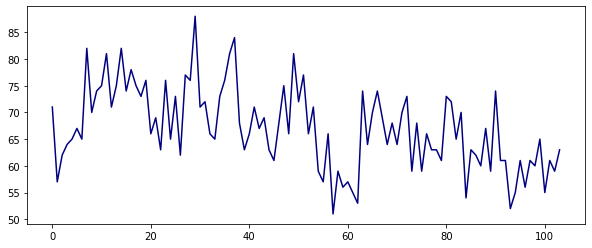

104

In [19]:
# Vẽ biểu đồ chuỗi số
plt.subplots(figsize = (10,4))
plt.plot(y, color='navy')
plt.show()

N = len(y)
N

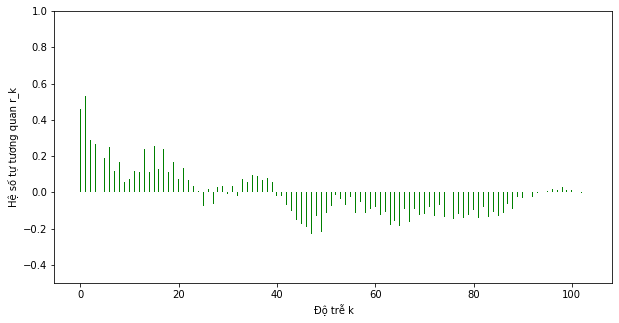

In [37]:
# MÔ PHỎNG QUÁ TRÌNH AR(2) VÀ TÍNH HÀM TỰ TƯƠNG QUAN RIÊNG PHẦN PACF
K = len(y)
#TÍnh ACF
result = sACF(y,K)
ACF = result[0]

# Vẽ đồ thị
fig = plt.figure(figsize = (10,5))
x = np.arange(K)
plt.bar(x, ACF, color='green', width = 0.2)
plt.xlabel("Độ trễ k")
plt.ylabel("Hệ số tự tương quan r_k")
plt.ylim([-0.5,1])
plt.show()

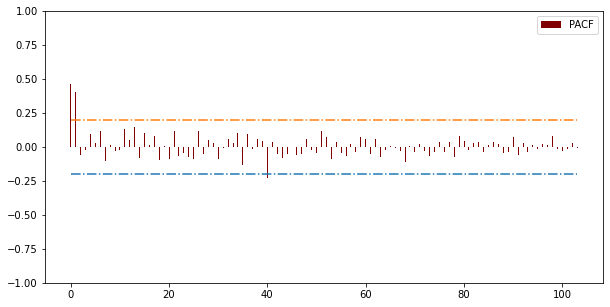

In [40]:
# TÍnh PACF = các hệ số tương quan riêng phần
result = sPACF(y,K)
PACF = result[0]

PACF
#Ve do thi

fig, ax = plt.subplots(figsize=(10,5))
ax.bar(x, PACF, color='maroon', width=0.2, label='PACF')
ax.plot(x,-2/np.sqrt(N)*np.ones(K), linestyle='dashdot')
ax.plot(x,2/np.sqrt(N)*np.ones(K), linestyle='dashdot')
ax.set_ylim([-1,1])
plt.legend()
plt.show()

In [41]:
# Tính trung bình, phương sai của chuỗi yi
T = len(y)
ytb = y.mean()
var_yt = np.sum((y-ytb)**2)/T
print("Trung bình = %f, phương sai = %f" %(ytb, var_yt))

Trung bình = 67.067308, phương sai = 58.735854


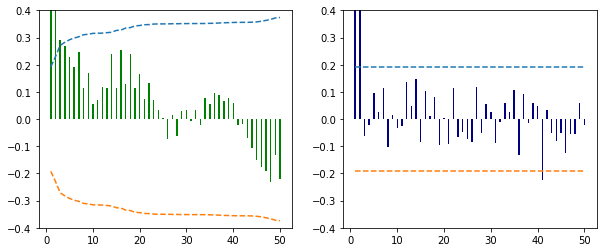

In [42]:
K = 50
# Tính ACF
ACF, se_ACF = sACF(y, K)
#Tinh PACF 
PACF, se_PACF = sPACF(y,K)

# Vẽ đồ thị
fig,ax = plt.subplots(1,2,figsize = (10,4))
x = np.arange(1,K+1)
# Đồ thị ACF
ax[0].bar(x, ACF, color='green', width = 0.3, label='ACF')
ax[0].plot(x, 1.96*se_ACF, linestyle='dashed')
ax[0].plot(x, -1.96*se_ACF, linestyle='dashed')
ax[0].set_ylim([-0.4, 0.4])
# Đồ thị PACF
ax[1].bar(x, PACF, color='navy', width = 0.3, label='PACF')
ax[1].plot(x, 1.96*se_PACF, linestyle='dashed')
ax[1].plot(x, -1.96*se_PACF, linestyle='dashed')
ax[1].set_ylim([-0.4, 0.4])

plt.show()

In [43]:
# Ước lượng mô hình AR(1) cho loan
# ƯỚc lượng tham số
xdata = y[:-1]
ydata = y[1:]

#fit_intercept=False: luôn đi qua gốc toạ độ, không có hệ số tự do
model = LinearRegression(fit_intercept=False)

# Chuyển xdata thành ma trận
X = xdata[:, np.newaxis]
#Khớp 2 cái lại với nhau 
model.fit(X,ydata)
print("Tham so beta", model.coef_)

# Sai số tiêu chuẩn của ước lượng tham số mô hình
at = ydata - model.predict(X)
sigma = np.sqrt(np.sum(at**2)/(len(at)-1))
se_beta = sigma*np.sqrt(np.diag(np.linalg.inv(X.T@X)))
print("Sai số tiêu chuẩn của beta", se_beta)
print("Sigma = ", sigma)


Tham so beta [0.99189673]
Sai số tiêu chuẩn của beta [0.01165673]
Sigma =  7.990891116181798


In [44]:
#Đánh giá mô hình bằng hệ số xác định (R^2) và thống kê Q(k)
#biến thiên sai số
SE = np.sum(at**2)
# biến thiên tổng thể
ST = np.sum((ydata - ydata.mean())**2)

R2 = 1 - SE/ST
# R2 giải thích độ biến thiên của 4% dữ liệu
print('R2', R2)



R2 -0.06897032166459915


In [45]:
# Tính thống kê Q(k)
def Qstat(at,k):
    at_ACF = sACF(at,k)[0]
    n = len(at)
    Qstat = 0
    for i in range(k):
        Qstat += n*(n+2)*at_ACF[i]**2/(n-i-1)
    return Qstat

k = 12
print("Giá trị thống kê Q(%d) = %f" %(k,Qstat(at,k)))
    


Giá trị thống kê Q(12) = 58.544080


In [46]:
# ƯỚc lượng mô hình MA(1) cho loan applications
# ƯỚc lượng tham số
from sklearn.linear_model import LinearRegression
xdata = at[:-1]
ydata = y[2:]

#fit_intercept=False: luôn đi qua gốc toạ độ, không có hệ số tự do
model = LinearRegression(fit_intercept=False)

# Chuyển xdata thành ma trận
X = xdata[:, np.newaxis]
#Khớp 2 cái lại với nhau 
model.fit(X,ydata)
print("Tham so beta", model.coef_)

# Sai số tiêu chuẩn của ước lượng tham số mô hình
e = ydata - model.predict(X)
sigma = np.sqrt(np.sum(e**2)/(len(e)-1))
se_beta = sigma*np.sqrt(np.diag(np.linalg.inv(X.T@X)))
print("Sai số tiêu chuẩn của beta", se_beta)
print("Sigma = ", sigma)

Tham so beta [0.39472733]
Sai số tiêu chuẩn của beta [0.84169324]
Sigma =  67.8233957360865
